In [ ]:
# Importing all necessary Libraries
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [ ]:
df_data = pd.read_csv('/content/netflix1.csv')   
df_data.head()    

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,PG-13,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,9/24/2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,9/24/2021,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,9/22/2021,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,s8,Movie,Sankofa,Haile Gerima,United States,9/24/2021,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"


In [ ]:
df_data.columns

Index(['show_id', 'type', 'title', 'director', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in'],
      dtype='object')

In [ ]:
df_data.drop('show_id', axis=1,inplace=True)
# remove unecessay column 

In [ ]:
df_data.describe() 

,release_year
count,8790.000000
mean,2014.183163
std,8.825466
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [ ]:
df_data.info()    

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8790 entries, 0 to 8789
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8790 non-null   object
 1   type          8790 non-null   object
 2   title         8790 non-null   object
 3   director      8790 non-null   object
 4   country       8790 non-null   object
 5   date_added    8790 non-null   object
 6   release_year  8790 non-null   int64 
 7   rating        8790 non-null   object
 8   duration      8790 non-null   object
 9   listed_in     8790 non-null   object
dtypes: int64(1), object(9)
memory usage: 686.8+ KB


In [ ]:
# Is there any missing values ?
print('Is there any missing values?',df_data.isnull().sum().any())

Is there any missing values? False


In [ ]:
#sum of dublicate data
df_data.duplicated().sum()

0

In [ ]:
# number of unique values in a given Series
df_data.nunique()

show_id         8790
type               2
title           8787
director        4528
country           86
date_added      1713
release_year      74
rating            14
duration         220
listed_in        513
dtype: int64

In [ ]:
# Which country produce more 
df_data['country'].value_counts()
# The United States has the largest production

United States     3240
India             1057
United Kingdom     638
Pakistan           421
Not Given          287
                  ... 
Iran                 1
West Germany         1
Greece               1
Zimbabwe             1
Soviet Union         1
Name: country, Length: 86, dtype: int64

In [ ]:
df_data['release_year'].value_counts()
# Most of the productions were in 2018

2018    1146
2017    1030
2019    1030
2020     953
2016     901
        ... 
1966       1
1959       1
1925       1
1947       1
1961       1
Name: release_year, Length: 74, dtype: int64

In [ ]:
df_data['rating'].value_counts()
# Most reviews are TV-MA

TV-MA       3205
TV-14       2157
TV-PG        861
R            799
PG-13        490
TV-Y7        333
TV-Y         306
PG           287
TV-G         220
NR            79
G             41
TV-Y7-FV       6
NC-17          3
UR             3
Name: rating, dtype: int64

In [ ]:
df_data['duration'].value_counts()
# the most production is in 1 Season

1 Season      1791
2 Seasons      421
3 Seasons      198
90 min         152
97 min         146
              ... 
5 min            1
16 min           1
186 min          1
193 min          1
11 Seasons       1
Name: duration, Length: 220, dtype: int64

In [ ]:
df_data['listed_in'].value_counts()
# The most classifications are Dramas, International Movies

Dramas, International Movies                                362
Documentaries                                               359
Stand-Up Comedy                                             334
Comedies, Dramas, International Movies                      274
Dramas, Independent Movies, International Movies            252
                                                           ... 
Anime Features                                                1
Action & Adventure, Horror Movies, Independent Movies         1
Action & Adventure, Classic Movies, International Movies      1
Cult Movies, Independent Movies, Thrillers                    1
Classic & Cult TV, Crime TV Shows, TV Dramas                  1
Name: listed_in, Length: 513, dtype: int64

In [ ]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8790 entries, 0 to 8789
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8790 non-null   object
 1   type          8790 non-null   object
 2   title         8790 non-null   object
 3   director      8790 non-null   object
 4   country       8790 non-null   object
 5   date_added    8790 non-null   object
 6   release_year  8790 non-null   int64 
 7   rating        8790 non-null   object
 8   duration      8790 non-null   object
 9   listed_in     8790 non-null   object
dtypes: int64(1), object(9)
memory usage: 686.8+ KB


In [ ]:
# drop the deuplicates 
df_data.drop_duplicates(subset=None,keep='first',inplace=True)
df_data.duplicated().sum()

0

In [ ]:
country = df_data.groupby(['country','type'])['type'].count().sort_values().reset_index(name='count')
country

# Most production in the United States is Movies
# Most production in the United Kingdom is movies
# Most production in the India is Movies

,country,type,count
0,Zimbabwe,Movie,1
1,Cyprus,TV Show,1
2,Czech Republic,TV Show,1
3,Soviet Union,Movie,1
4,Somalia,Movie,1
...,...,...,...
133,Pakistan,TV Show,350
134,United Kingdom,Movie,387
135,United States,TV Show,845
136,India,Movie,976


In [ ]:
cu =  df_data.groupby(['country','listed_in'])['listed_in'].count().sort_values().reset_index(name='count')
cu
# Most production in the United States are: Documentaries and Stand-Up Comedy
# Most production in the India are: Dramas, International Movies and Comedies

,country,listed_in,count
0,Argentina,"Action & Adventure, Comedies, International Mo...",1
1,Pakistan,"Anime Series, International TV Shows, TV Thril...",1
2,Pakistan,"Anime Series, International TV Shows, Romantic...",1
3,Pakistan,"Anime Series, Crime TV Shows, International TV...",1
4,Pakistan,"Anime Features, Documentaries",1
...,...,...,...
2015,United States,"Children & Family Movies, Comedies",122
2016,India,"Dramas, International Movies",122
2017,India,"Comedies, Dramas, International Movies",124
2018,United States,Stand-Up Comedy,216


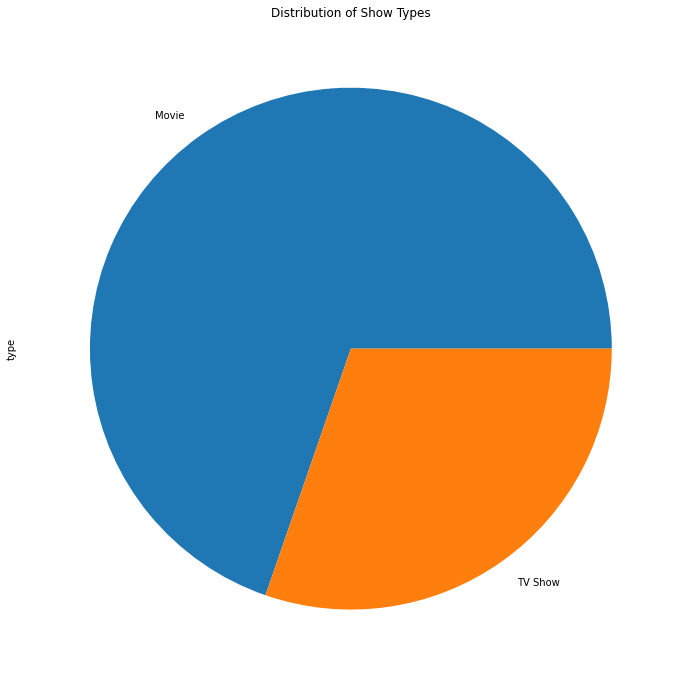

In [ ]:
plt.figure(figsize=(15,12))
df_data['type'].value_counts().plot.pie()
plt.title('Distribution of Show Types')
plt.show()

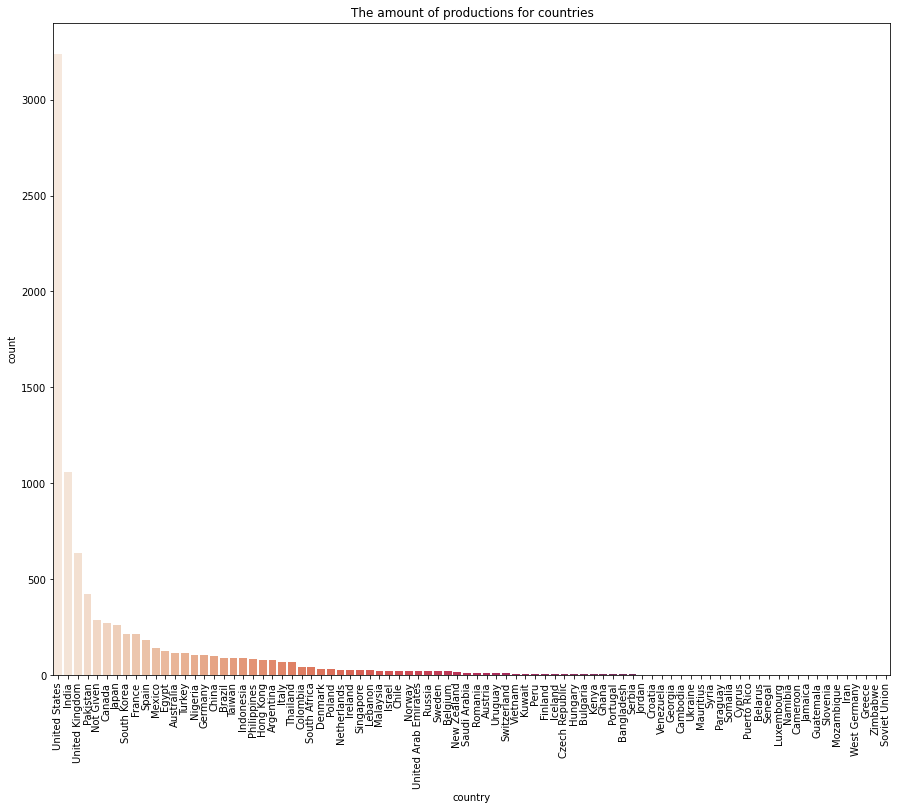

In [ ]:
plt.figure(figsize=(15,12))
sns.countplot(x='country',data=df_data,palette='rocket_r',order=df_data['country'].value_counts().index)
plt.xticks(rotation=90)
plt.title('The amount of productions for countries')
plt.show()

# The top production contries are united states , india , united kingdom

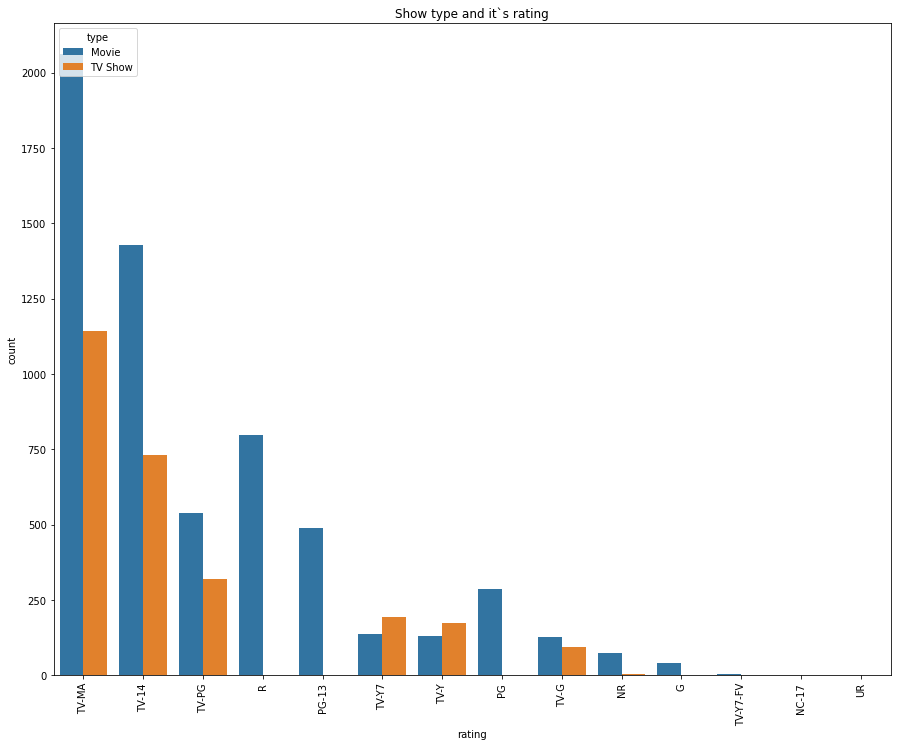

In [ ]:
plt.figure(figsize=(15,12))
sns.countplot(x='rating',data=df_data,hue='type',order=df_data['rating'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Show type and it`s rating')
plt.show()

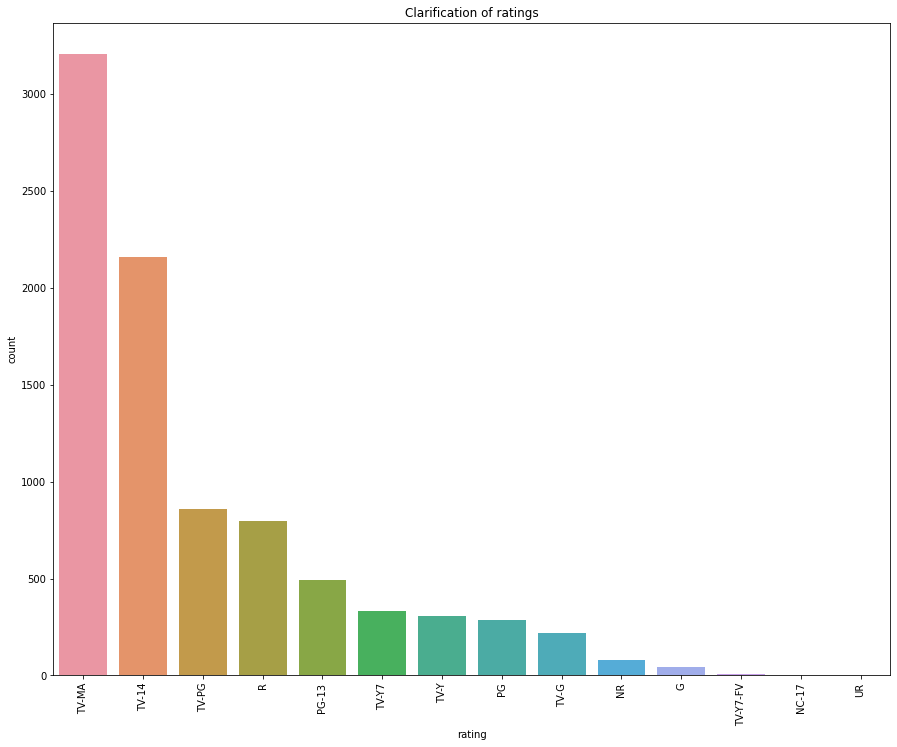

In [ ]:
 
plt.figure(figsize=(15,12))
sns.countplot(x='rating',data=df_data,order=df_data['rating'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Clarification of ratings')
plt.show()
# 3205 show is for Mature Audiences and 2157 for age above 14

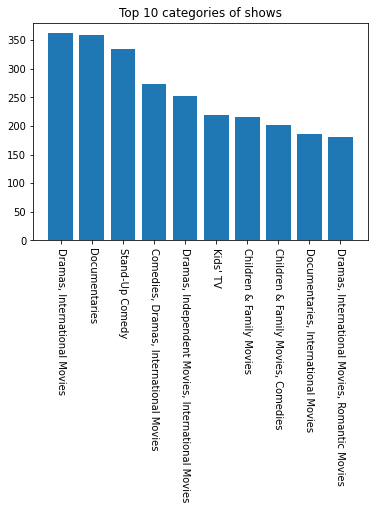

In [ ]:
 

top10_rating = df_data['listed_in'].value_counts().head(10)
plt.bar(top10_rating.index, top10_rating.values)
plt.title('Top 10 categories of shows')
plt.xticks(rotation=-90) 
plt.show()

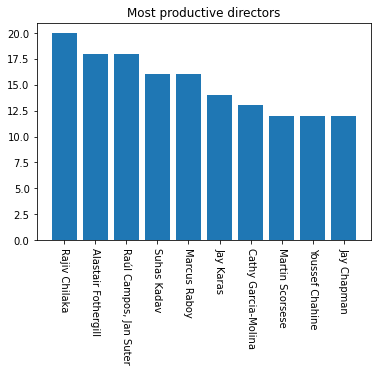

In [ ]:

top10_director = df_data['director'].value_counts().drop("Not Given").head(10)
plt.bar(top10_director.index, top10_director.values)
plt.title('Most productive directors')
plt.xticks(rotation=-90) 
plt.show()

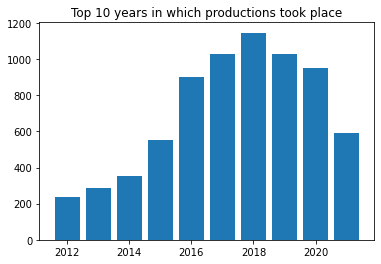

In [ ]:
top10_years = df_data['release_year'].value_counts().head(10)
plt.bar(top10_years.index, top10_years.values)
plt.title('Top 10 years in which productions took place')
plt.show()

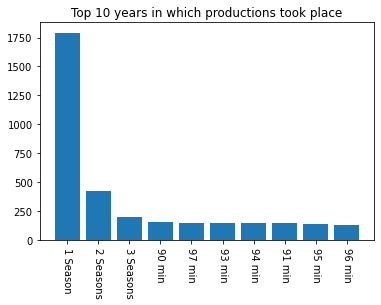

In [ ]:
top10_duration = df_data['duration'].value_counts().head(10)
plt.bar(top10_duration.index, top10_duration.values)
plt.title('Top 10 years in which productions took place')
plt.xticks(rotation=-90)
plt.show()

#In a year, which director released the most movies

<ipython-input-77-0194c4d52939>:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(df['director'], rotation=90)


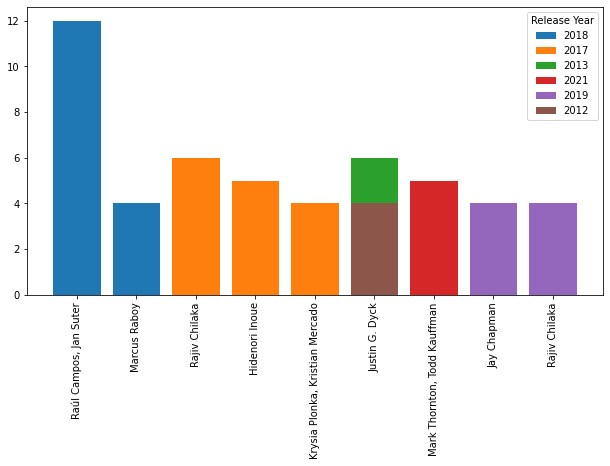

In [ ]:
 

df= df_data.groupby(['director','release_year'])['release_year'].count().drop("Not Given").sort_values(ascending=False).reset_index(name='count').head(10)
fig = plt.figure(figsize=(10,5))
ax = fig.add_axes([0.1,.1,.8,.8])

for year in df['release_year'].unique():
    df_year = df[df['release_year'] == year]
    ax.bar(df_year['director'], df_year['count'], label=year)
ax.set_xticklabels(df['director'], rotation=90)
ax.legend(title='Release Year')
plt.show()
 

 

In [ ]:
df

,director,release_year,count
0,"Raúl Campos, Jan Suter",2018,12
1,Marcus Raboy,2017,6
2,Rajiv Chilaka,2013,6
3,Hidenori Inoue,2017,5
4,"Krysia Plonka, Kristian Mercado",2021,5
5,Justin G. Dyck,2018,4
6,"Mark Thornton, Todd Kauffman",2019,4
7,Jay Chapman,2017,4
8,Rajiv Chilaka,2012,4
9,Fernando Ayllón,2019,4
